In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
auto_purchase = pd.read_csv(r'C:\Users\himani.makode\Downloads\Analytics Exercise\Analytics Exercise V2\auto_purchases.csv')


# rename transaction type name

In [32]:
# Clean Data
auto_purchase = auto_purchase[auto_purchase['newusedflag'] != 'D']

In [33]:
# check for head and tail
print(auto_purchase.head(5))
print(auto_purchase.tail(5))

                               purchaser_id transactiontype newusedflag  \
0  3e0e3fd7d6d89b230c94147ed43a4e81644202f6               C           U   
1  44449b513697861a7b44d0913349782f71f60b23               D           U   
2  ce1bc4b8ff39b57bc0111d79ce768490fbb84e6e               D           U   
3  71a238a768c280f0317c6cf75678ecde49a2291c               D           U   
4  63223244c25198d4543b7eca3d6fb74e8d6b5f3c               D           U   

   modelyear  vehprice                     segment  
0       2016     21300           Large Pickup - LD  
1       2016     15900         Compact Premium Car  
2       2017     25000           Small Premium SUV  
3       2003      6400  Compact Premium Sporty Car  
4       2019     41500           Large Pickup - LD  
                                   purchaser_id transactiontype newusedflag  \
16973  502b540c61052531bdcea95f161c6f97c37c3c83               D           U   
16974  aa9438843561d988e3f9db87614ac5dfd26d9a2f               D          

In [34]:
auto_purchase.shape

(16824, 6)

In [35]:
auto_purchase.vehprice.describe()

count     16824.000000
mean      29443.063481
std       18657.898391
min         500.000000
25%       17200.000000
50%       26300.000000
75%       37600.000000
max      368300.000000
Name: vehprice, dtype: float64

In [36]:
auto_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16824 entries, 0 to 16977
Data columns (total 6 columns):
purchaser_id       16824 non-null object
transactiontype    16824 non-null object
newusedflag        16824 non-null object
modelyear          16824 non-null int64
vehprice           16824 non-null int64
segment            16824 non-null object
dtypes: int64(2), object(4)
memory usage: 920.1+ KB


In [37]:
auto_purchase.duplicated().sum()

0

In [38]:
# check outliers

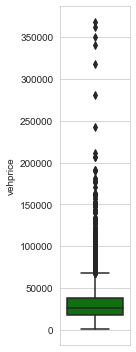

In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(2,5))
plt.subplot(1,1,1)
sns.set_style('whitegrid')
sns.boxplot(auto_purchase['vehprice'],color='green',orient='v')
plt.tight_layout()

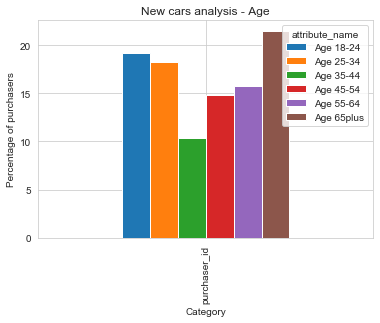

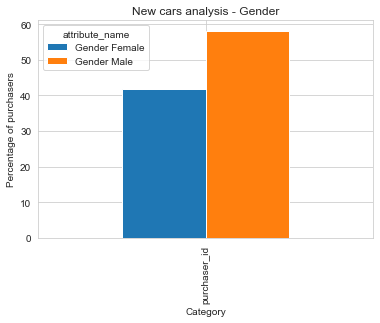

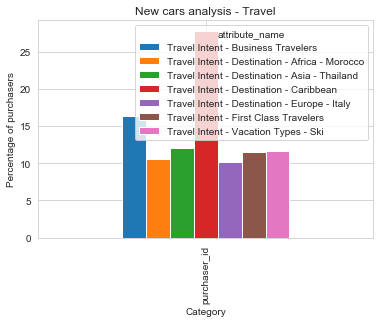

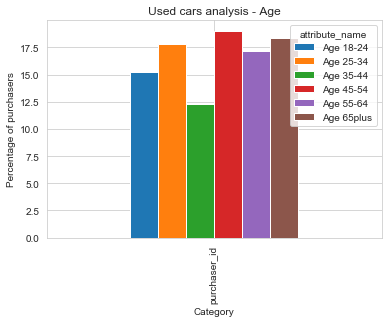

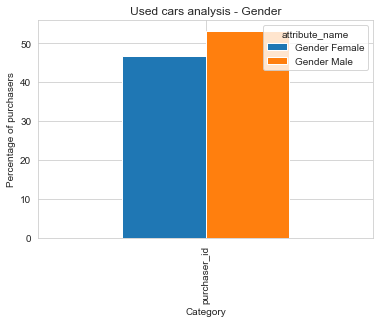

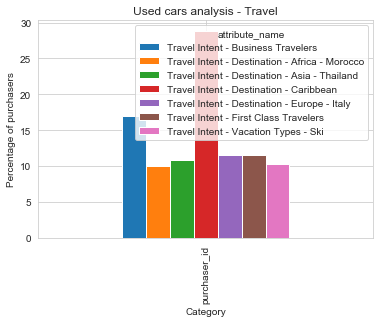

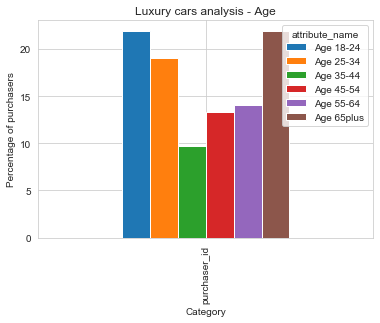

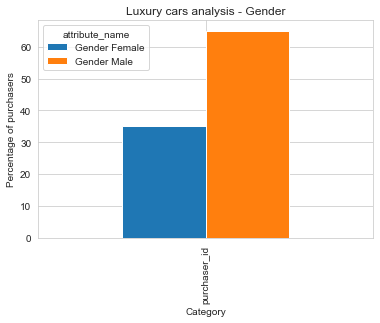

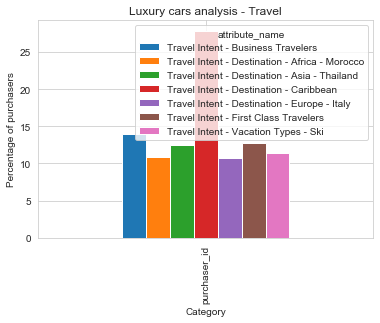

Analysis Done


In [40]:

def plot_group(df_dict, title, categories):
    for cat in categories:
        df_dict[cat].plot.bar()
        plt.xlabel("Category")
        plt.ylabel("Percentage of purchasers")
        plt.title(title + " - " + cat)
        plt.show()


def analyze_group(df, categories):
    ret_dict = {}
    project_list = ['purchaser_id', 'attribute_name']
    for cat in categories:
        df_cat = df[df['category'] == cat]
        df_cat_reqd = df_cat[project_list].drop_duplicates()
        pivoted_res = pd.pivot_table(df_cat_reqd, values='purchaser_id', columns=['attribute_name'], aggfunc=np.count_nonzero)
        cat_percentage = pivoted_res.div(pivoted_res.sum(axis=1), axis=0).multiply(100, axis=0)
        ret_dict[cat] = cat_percentage
    return ret_dict

def add_attribute_category(row):
    if row['attribute_name'].startswith('Age'):
        return 'Age'
    elif row['attribute_name'].startswith('Gender'):
        return 'Gender'
    elif row['attribute_name'].startswith('Travel Intent'):
        return 'Travel'
    else:
        return 'Other'


if __name__ == '__main__':
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    auto_purchase = pd.read_csv(r'C:\Users\himani.makode\Downloads\Analytics Exercise\Analytics Exercise V2\auto_purchases.csv')
    onboarder_matches = pd.read_csv(r'C:\Users\himani.makode\Downloads\Analytics Exercise\Analytics Exercise V2\onboarder_matches.csv')
    attribute_data = pd.read_csv(r'C:\Users\himani.makode\Downloads\Analytics Exercise\Analytics Exercise V2\attributes_data.csv')
    attribute_lookup = pd.read_csv(r'C:\Users\himani.makode\Downloads\Analytics Exercise\Analytics Exercise V2\attributes_lookup.csv')

    attribute_lookup['category'] = attribute_lookup.apply(add_attribute_category, axis=1)
    categories = ['Age', 'Gender', 'Travel']

    merged_df = auto_purchase.merge(onboarder_matches, how='inner', on='purchaser_id')
    merged_df = merged_df.merge(attribute_data, how='inner', on='device_id')
    merged_df = merged_df.merge(attribute_lookup, how='inner', on='display_code')
    
    

    new_analysis_dict = analyze_group(merged_df[merged_df['newusedflag'] == 'N'], categories)
    plot_group(new_analysis_dict, "New cars analysis", categories)

    used_analysis_dict = analyze_group(merged_df[merged_df['newusedflag'] == 'U'], categories)
    plot_group(used_analysis_dict, "Used cars analysis", categories)

    luxury_analysis_dict = analyze_group(merged_df[merged_df['vehprice'] > 50000], categories)
    plot_group(luxury_analysis_dict, "Luxury cars analysis", categories)
    print("Analysis Done")


In [53]:
merged_df.to_csv(r"C:\Users\himani.makode\Downloads\Analytics Exercise\Analytics Exercise V2\copy\merged_csv.csv")

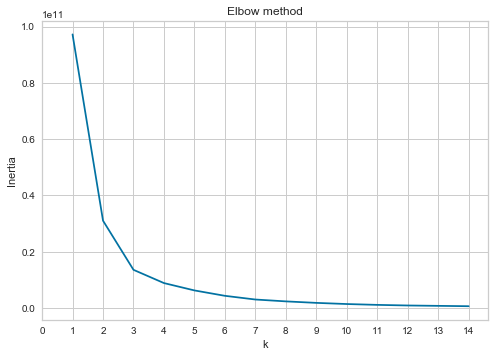

In [106]:
# k-mean clustering
from sklearn.cluster import KMeans

age_category = 'Age 18-24'
top_five_segments = ['Compact SUV', 'Midsize SUV', 'Compact Car', 'Midsize Car', 'Large Pickup - LD']
price_age_df = merged_df[(merged_df['attribute_name'] == age_category) & (merged_df['segment'].isin(top_five_segments))]

X = price_age_df[["vehprice", "vehprice"]]

inertia = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker="x")
plt.xlabel("k")
plt.xticks(np.arange(15))
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

Text(0, 0.5, 'Vehicle Price')

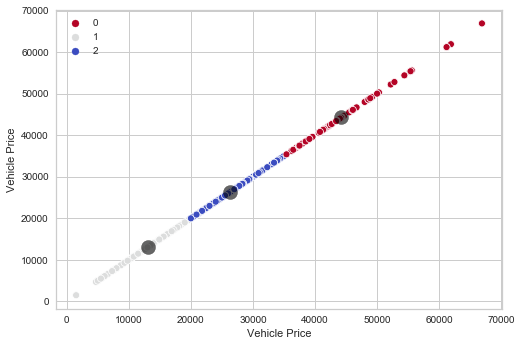

In [107]:
import seaborn as sns

X = price_age_df[["vehprice", "vehprice"]]
km = KMeans(n_clusters=3,n_init = 6, init="random", random_state=42)
km.fit(X)
y_kmeans = km.predict(X)

sns.scatterplot(data=price_age_df,x="vehprice", y="vehprice", hue=y_kmeans, palette="coolwarm_r")
centers= km.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c="black",s=200, alpha=0.6)
plt.xlabel("Vehicle Price")
plt.ylabel("Vehicle Price")

In [108]:
# print(y_kmeans[0:10])
price_age_df['cluster'] = y_kmeans
# print(price_age_df.head())
print(price_age_df['cluster'].value_counts())
# price_age_df.to_csv(r"C:\Users\himani.makode\Downloads\Analytics Exercise\Analytics Exercise V2\copy\price_55-64age_df.csv")


2    127
1     97
0     77
Name: cluster, dtype: int64


C:\Users\khushbu.makode\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
price_age_df['cluster'].value_counts()

0    161
1    151
2     57
Name: cluster, dtype: int64

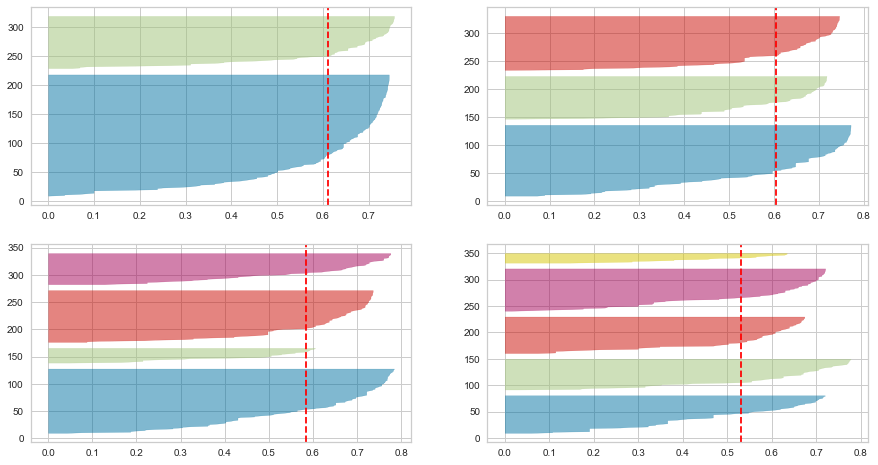

In [109]:
# k mean
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)